### _Note: most of these steps are replicated from a different project with different data. This is mainly constructed as a reference for similar projects and steps._

In [52]:
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### Load in public data example. 
See https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3

In [53]:
df = pd.read_csv("~/Downloads/new-york-city-airbnb-open-data/AB_NYC_2019.csv") 

In [54]:
pd.set_option('display.max_columns',200)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [55]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [56]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Let's count percentage of NAs per row. 

In [57]:
df.isna().sum()/len(df)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### Fill NAs. 

In [58]:
df.fillna('NA',inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,NA,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


### Drop columns

In [59]:
#let's take out irrelevant fields
df = df.drop(columns=['id'])

In [60]:
print(df.shape)
df.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,NA,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


In [61]:
#20% of rows have no reviews
(df['number_of_reviews'].eq(0).sum())/len(df)

0.20558339298496778

### Get rid of rows with no reviews. 

In [62]:
#let's go ahead and get rid of them for now 
df = df[df['number_of_reviews'] != 0]

In [63]:
df.shape

(38843, 15)

In [64]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

In [65]:
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
#save original versions of categorical columns for later
catcols = df[categorical_cols]

In [66]:
catcols

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21,0.38
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19,0.1
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22,0.59
6,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,Private room,2017-10-05,0.4
7,Large Furnished Room Near B'way,Shunichi,Manhattan,Hell's Kitchen,Private room,2019-06-24,3.47
8,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,Private room,2017-07-21,0.99
9,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Chinatown,Entire home/apt,2019-06-09,1.33
10,Beautiful 1br on Upper West Side,Lena,Manhattan,Upper West Side,Entire home/apt,2019-06-22,0.43


### Change review per month to numeric. 

In [67]:
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'])

In [68]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

In [69]:
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
#save original versions of categorical columns for later
catcols = df[categorical_cols]

In [70]:
catcols.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22


In [71]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [72]:
#save original df 
dfog = df.copy()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,9937,4303,1,107,1,1501
1,30026,4120,2,126,0,1715
3,11949,5363,1,41,0,1760
4,15108,5114,2,61,0,1532
5,19655,1666,2,136,0,1747
6,6312,3049,1,13,1,1122
7,19679,8347,2,94,1,1749
8,11885,5937,2,200,1,1046
9,13817,1044,2,35,0,1734
10,4355,5204,2,200,0,1747


In [73]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9937,2787,4303,1,107,40.64749,-73.97237,1,149,1,9,1501,0.21,6,365
1,30026,2845,4120,2,126,40.75362,-73.98377,0,225,1,45,1715,0.38,2,355
3,11949,4869,5363,1,41,40.68514,-73.95976,0,89,1,270,1760,4.64,1,194
4,15108,7192,5114,2,61,40.79851,-73.94399,0,80,10,9,1532,0.10,1,0
5,19655,7322,1666,2,136,40.74767,-73.97500,0,200,3,74,1747,0.59,1,129


In [74]:
df.shape

(38843, 15)

In [75]:
df.describe()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,38843.000000,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,19134.095847,6.423915e+07,4676.447417,1.665397,105.174214,40.728134,-73.951148,0.498339,142.317947,5.868059,29.297557,1490.095976,1.373221,5.164457,114.882888
std,11031.220029,7.588847e+07,2788.779120,0.742818,68.149129,0.054990,0.046695,0.541816,196.945624,17.384784,48.186374,400.673148,1.680442,26.295665,129.543636
min,0.000000,2.438000e+03,0.000000,0.000000,0.000000,40.506410,-74.244420,0.000000,0.000000,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9592.500000,7.033824e+06,2186.000000,1.000000,51.000000,40.688640,-73.982470,0.000000,69.000000,1.000000,3.000000,1398.000000,0.190000,1.000000,0.000000
50%,19113.000000,2.837193e+07,4535.000000,2.000000,93.000000,40.721710,-73.954800,0.000000,101.000000,2.000000,9.000000,1713.000000,0.720000,1.000000,55.000000
75%,28664.500000,1.018465e+08,7022.500000,2.000000,176.000000,40.762990,-73.935020,1.000000,170.000000,4.000000,33.000000,1748.000000,2.020000,2.000000,229.000000
max,38269.000000,2.738417e+08,9886.000000,4.000000,217.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,1763.000000,58.500000,327.000000,365.000000


### Test for multicolinearity.

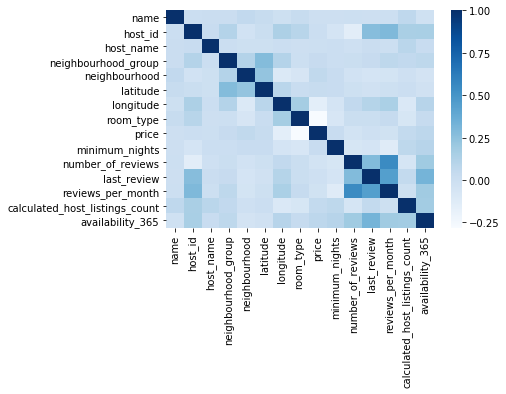

In [76]:
# we can get rid of some columns for now to avoid multicolinearity 
#test for multicolinearity using a correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap = "Blues")
#reviews per month and last review/number of reviews are highly correlated 

### Drop last review and number of reviews

In [77]:
df = df.drop(columns=['last_review','number_of_reviews'])

### Make new version of reviews per month where it is greater than 1 or not. 

In [78]:
df['reviews'] = [0] * len(df)
df.loc[df['reviews_per_month'] > 1, 'reviews'] = 1

#drop original reviews per month variable
df = df.drop(columns='reviews_per_month')

### Function Defining list of classification models

In [79]:
def define_models(models = dict()):


    '''
    This method creates library of models to be evaluated {modelName: modelObject}
    '''
    
    n_trees = 1000
    models['logistic'] = LogisticRegression()
    models['Decision Tree'] = DecisionTreeClassifier()
    models['Random Forest'] = RandomForestClassifier(n_estimators=n_trees)
    #models['AdaBoostClassifier'] = AdaBoostClassifier(n_estimators=n_trees)
    #models['BaggingClassifier'] = BaggingClassifier(n_estimators=n_trees)
    #models['ExtraTreesClassifier'] = ExtraTreesClassifier(n_estimators=n_trees)
    #models['GradientBoostingClassifier'] = GradientBoostingClassifier(n_estimators=n_trees)
    models['Naive Bayes'] = GaussianNB()
    #models['C-Support Vector Classification linear'] = SVC(kernel='linear')
    #models['C-Support Vector Classification poly'] = SVC(kernel='poly')
    models['XG-Boost'] = XGBClassifier()
    #models['Cat-Boost'] = CatBoostClassifier(iterations=50)
    print('Defined %d models' % len(models))
    return models

### Run model on full dataset to investigate importance of variables. Currently have 47 variables to look at. 

In [80]:
import random
random.seed(1)
#store the result variable as separate df 
X = df.drop(columns = ['reviews'])
y = df['reviews']

### Model evaluation function: Stores the model results(Accuracy and F1-Score) in an excel spreadhseet

In [81]:
def evaluate_models(X, y, model):
    '''
    method to evaluate dictionary of model
    INPUT: dict('modelName':modelObject)
    OUTPUT: dict('modelName':score)
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    results1=dict()
    results2=dict()
    for name, model in model.items():
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        results1[name+' Accuracy score'] = model.score(X_test,y_test)
        results2[name+ ' F1 Score'] = f1_score(y_test, pred)
    results2.update(results1)
    resultDf = pd.DataFrame.from_dict(results2,orient = 'index')
    print(resultDf)
    # NOTE: Change the below path to your own directory
    #resultDf.to_excel("result.xlsx")

### Main method

In [82]:
def run():
    '''
    Main method
    '''
    models = define_models()
    evaluate_models(X, y,models)

In [83]:
run()

Defined 5 models


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                                     0
logistic F1 Score             0.450233
Decision Tree F1 Score        0.633425
Random Forest F1 Score        0.741496
Naive Bayes F1 Score          0.421658
XG-Boost F1 Score             0.731860
logistic Accuracy score       0.634847
Decision Tree Accuracy score  0.698692
Random Forest Accuracy score  0.783236
Naive Bayes Accuracy score    0.648028
XG-Boost Accuracy score       0.770158


### Let's look at feature importance to start 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
dt1 = DecisionTreeClassifier().fit(X_train,y_train)
importances = dt1.feature_importances_
impdf = pd.DataFrame({'features':X_test.columns,'importance':importances}).sort_values(by='importance',ascending=False)
print(impdf[:13])

                          features  importance
11                availability_365    0.255749
9                   minimum_nights    0.129815
1                          host_id    0.108340
6                        longitude    0.090809
0                             name    0.086547
5                         latitude    0.085796
2                        host_name    0.080413
8                            price    0.075639
4                    neighbourhood    0.040847
10  calculated_host_listings_count    0.028108
7                        room_type    0.012229
3              neighbourhood_group    0.005709


In [85]:
n_trees = 1000
rf1 = RandomForestClassifier(n_estimators=n_trees).fit(X_train,y_train)
importances = rf1.feature_importances_
impdf = pd.DataFrame({'features':X_test.columns,'importance':importances}).sort_values(by='importance',ascending=False)
print(impdf[:17])

                          features  importance
11                availability_365    0.239000
1                          host_id    0.120903
9                   minimum_nights    0.109574
6                        longitude    0.092206
5                         latitude    0.086171
0                             name    0.083427
2                        host_name    0.080219
8                            price    0.077926
4                    neighbourhood    0.046644
10  calculated_host_listings_count    0.038467
7                        room_type    0.013724
3              neighbourhood_group    0.011739


### Find optimal number of input variables for Decision Tree and Random Forest Models. 

In [86]:
from sklearn.feature_selection import SelectFromModel
model1 = SelectFromModel(dt1, prefit=True)
X_new1 = model1.transform(X)
X_new1.shape

(38843, 6)

In [87]:
from sklearn.feature_selection import SelectFromModel
model2 = SelectFromModel(rf1, prefit=True)
X_new2 = model2.transform(X)
X_new2.shape

(38843, 6)

### Let's take the top 6 variables. availability_365, host_id, minimum_nights, longitude, latitude, name. 

In [88]:
df = df[['reviews','availability_365', 'host_id', 'minimum_nights', 'longitude', 'latitude', 'name']]

In [89]:
catcols.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [90]:
df.head()

,reviews,availability_365,host_id,minimum_nights,longitude,latitude,name
0,0,365,2787,1,-73.97237,40.64749,9937
1,0,355,2845,1,-73.98377,40.75362,30026
3,1,194,4869,1,-73.95976,40.68514,11949
4,0,0,7192,10,-73.94399,40.79851,15108
5,0,129,7322,3,-73.97500,40.74767,19655


### Let's convert the categorical columns back to category names so that we can use dummy variables instead to avoid hierarchies within the encoding.

In [91]:
df[['name']] = catcols[['name']]
df.head()

,reviews,availability_365,host_id,minimum_nights,longitude,latitude,name
0,0,365,2787,1,-73.97237,40.64749,Clean & quiet apt home by the park
1,0,355,2845,1,-73.98377,40.75362,Skylit Midtown Castle
3,1,194,4869,1,-73.95976,40.68514,Cozy Entire Floor of Brownstone
4,0,0,7192,10,-73.94399,40.79851,Entire Apt: Spacious Studio/Loft by central park
5,0,129,7322,3,-73.97500,40.74767,Large Cozy 1 BR Apartment In Midtown East


### Let's instead use One Hot encoding to get dummy variables. 

In [92]:
df = pd.get_dummies(df,columns=['name'])

In [93]:
df.shape

(38843, 38276)

### Let's save this as a dataframe to be loaded easily into a new notebook for modeling. 

In [94]:
# Create storage object 
data_store = pd.HDFStore('cleanedairbnbny.h5')

# Put DataFrame into the object
data_store['cleanedairbnbny'] = df
data_store.close()

In [95]:
# Access data store
data_store = pd.HDFStore('cleanedairbnbny.h5')

# Retrieve data using key
preprocessed_df = data_store['cleanedairbnbny']
data_store.close()

In [96]:
preprocessed_df.shape

(38843, 38276)